# Representation Learning Assignment
We have learned the importance of representation. Let's try the example to understand better. Here is the code to produce the data similar to the example we used.

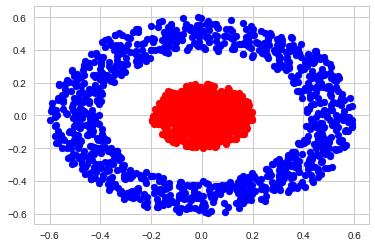

In [30]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

%matplotlib inline  

PI=np.pi
PI2=2*PI

def gencircle(rc,rr=0.1,offset=[0,0],num=100,label=0):
    #taken from https://qiita.com/xiangze750/items/1d024c8536d128c3ceae
    c=[]
    for i in range(num):
        r=rc+np.random.uniform(-rr,rr,1)
        th=np.random.uniform(0,PI2,1)
        c.append([r*np.sin(th)+offset[0],r*np.cos(th)+offset[1]])
    return np.c_[np.array(c).reshape(num,2),np.repeat(label,num)]

X=np.r_[gencircle(0.1,0.1,num=1000,label=0),gencircle(0.5,0.1,num=1000,label=1)][:,0:2]

plt.scatter(X[0:1000,0],X[0:1000,1],color="red")
plt.scatter(X[1000:2000,0],X[1000:2000,1],color="blue")

In [31]:
X

array([[-0.03597942, -0.01794801],
       [ 0.11680984,  0.09680496],
       [-0.00333146,  0.00382334],
       ..., 
       [ 0.43523319,  0.34139888],
       [ 0.21996141,  0.44369549],
       [ 0.29156638,  0.38797451]])

In [43]:
mydata = pd.DataFrame(X)
mydata.head()

,0,1
0,-0.035979,-0.017948
1,0.116810,0.096805
2,-0.003331,0.003823
3,-0.002850,-0.021912
4,-0.018157,0.063400


In [44]:
#Red = 0, Blue = 1
mydata['Color'] = 0
mydata.loc[1000:2000,('Color')] = 1
mydata.columns = ['Xcoord', 'Ycoord', 'Color']

In [45]:
mydata.head()

,Xcoord,Ycoord,Color
0,-0.035979,-0.017948,0
1,0.116810,0.096805,0
2,-0.003331,0.003823,0
3,-0.002850,-0.021912,0
4,-0.018157,0.063400,0


In [46]:
y = mydata.drop(labels = ['Xcoord', 'Ycoord'], axis=1).values
X = mydata.drop(labels = ['Color'], axis=1).values
print(y)
print(X)

[[0]
 [0]
 [0]
 ..., 
 [1]
 [1]
 [1]]
[[-0.03597942 -0.01794801]
 [ 0.11680984  0.09680496]
 [-0.00333146  0.00382334]
 ..., 
 [ 0.43523319  0.34139888]
 [ 0.21996141  0.44369549]
 [ 0.29156638  0.38797451]]


In [36]:
import tensorflow as tf
# set seed for numpy and tensorflow
# set for reproducible results
seed = 5
np.random.seed(seed)
tf.set_random_seed(seed)

As you see,  X  is a matrix whose shape is  2000×2  the first 1000 rows are corresponding to red points, and the second 1000 row are corresponding to the blue data points.

# Task
* Try logistic regression to classify the data. It's okay if it does not work.
* Try feed forward neural network to classify the data. For this one, you need to find the architecture that works. Remember that you can adjust number of hidden layers and number of hidden units in each layer, activation function, etc.
* Report the (training) classification accuracy for both.

Use tensorflow for coding. This time, you do not have to test the algorithm on test dataset, because the purpose it to understand the importance of representation learning.

### 1. Logistic Regression

In [8]:
import numpy as np # linear algebra
import seaborn as sns
sns.set(style='whitegrid')
import matplotlib.pyplot as plt
import tensorflow as tf
# Begin building the model framework
# Declare the variables that need to be learned and initialization
# There is one feature, so A's dimension is (2, 1)
A = tf.Variable(tf.random_normal(shape = [2,1]))
b = tf.Variable(tf.random_normal(shape = [1,1]))
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [9]:
# Define placeholders
data = tf.placeholder(dtype=tf.float32, shape=[None, 2])
target = tf.placeholder(dtype=tf.float32, shape=[None, 1])

In [10]:
# Declare the model you need to learn
mod = tf.matmul(data, A) + b

In [11]:
# Declare loss function
# Use the sigmoid cross-entropy loss function,
# first doing a sigmoid on the model result and then using the cross-entropy loss function
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
    logits=mod, labels=target))

In [12]:
# Define the learning rate， batch_size etc.
learning_rate = 0.005
batch_size = 400
iter_num = 1500

In [13]:
# Define the optimizer
opt = tf.train.GradientDescentOptimizer(learning_rate)

In [14]:
# Define the goal
goal = opt.minimize(loss)

In [15]:
# Define the accuracy
# The default threshold is 0.5, rounded off directly
prediction = tf.round(tf.sigmoid(mod))
# Bool into float32 type
correct = tf.cast(tf.equal(prediction, target), dtype=tf.float32)
# Average
accuracy = tf.reduce_mean(correct)
# End of the definition of the model framework

In [16]:
# Start training model
# Define the variable that stores the result
loss_trace = []
train_acc = []
test_acc = []

In [17]:

# training model
for epoch in range(iter_num):
    # Generate random batch index
    batch_index = np.random.choice(len(X), size=batch_size)
    batch_X = X[batch_index]
    batch_y = np.matrix(y[batch_index])
    sess.run(goal, feed_dict={data: batch_X, target: batch_y})
    temp_loss = sess.run(loss, feed_dict={data: batch_X, target: batch_y})
    # convert into a matrix, and the shape of the placeholder to correspond
    temp_acc = sess.run(accuracy, feed_dict={data: X, target: np.matrix(y)})
    # recode the result
    loss_trace.append(temp_loss)
    train_acc.append(temp_acc)
    # output
    if (epoch + 1) % 300 == 0:
        print('epoch: {:4d} loss: {:5f} accuracy: {:5f} '.format(epoch + 1, temp_loss,temp_acc))
        
sess.close()

epoch:  300 loss: 0.731460 accuracy: 0.373500 
epoch:  600 loss: 0.721914 accuracy: 0.385500 
epoch:  900 loss: 0.705413 accuracy: 0.402500 
epoch: 1200 loss: 0.727532 accuracy: 0.414500 
epoch: 1500 loss: 0.718238 accuracy: 0.419000 


### 2. Feed Forward Neural Network

In [41]:
import tensorflow as tf

# define computational graph
# Create the model
x = tf.placeholder(tf.float32, [None, 2])
h = tf.layers.dense(x,50)
y_m = tf.layers.dense(h,1)

#initializer
init = tf.global_variables_initializer()

# Define loss and optimizer
y_ = tf.placeholder(tf.int64, [None,1])
cross_entropy = tf.losses.softmax_cross_entropy(onehot_labels=y_, logits=y_m)
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)

loss_log = []
batch_size = 100
#run the graph as session
with tf.Session() as sess:
    sess.run(init) # reset values to wrong
    # training loop
    for _ in range(1000):
        batch_index = np.random.choice(len(X), size=batch_size)
        batch_xs = X[batch_index]
        batch_ys = np.matrix(y[batch_index])
        loss,_ = sess.run([cross_entropy,train_step], feed_dict={x: batch_xs, y_: batch_ys})
        loss_log.append(loss)

    # Test trained model
    correct_prediction = tf.equal(tf.argmax(y, 1),tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    accuracy_result = sess.run(accuracy, feed_dict={x: X,y_: y})
    print("accuracy is ",accuracy_result)

accuracy is  1.0
